# **Introduccion**

En este proyecto se llevará a cabo el análisis de las series de tiempo de dos marcas de gran relevancia en el sector económico: Sam's Club y Walmart. La hipótesis central que guía esta investigación es que ambas marcas están relacionadas entre sí, y el comportamiento de sus respectivas series de tiempo podría revelar patrones interdependientes. Este análisis buscará explorar cómo las fluctuaciones en las ventas, precios o variables asociadas a una marca pueden influir o correlacionarse con las de la otra, proporcionando así una comprensión más profunda de las dinámicas del mercado y el comportamiento de los consumidores.

El enfoque se centrará en la aplicación de técnicas avanzadas para el análisis de series de tiempo, comenzando con una evaluación independiente de cada serie. Posteriormente, se utilizará el concepto de causalidad de Granger para investigar posibles relaciones de causa y efecto entre las series de tiempo de ambas marcas. Además, se aplicará el modelo Prophet para realizar predicciones y pronósticos, evaluando sus alcances y limitaciones en este contexto específico.

A lo largo del proyecto, se estructurará un análisis detallado que incluya tanto los aspectos técnicos como los resultados obtenidos, y finalmente, se proporcionarán conclusiones basadas en los hallazgos clave de todo el proceso. Además, se garantizará la transparencia y accesibilidad del trabajo mediante la creación de un repositorio en GitHub, donde se subirá todo el código y los resultados obtenidos en el análisis.




**SAMS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = yf.download(
    tickers='SAMS.PA',
    start='2020-01-01',
    end='2023-01-01',
    interval='1d',
    group_by=None,
    auto_adjust=False,
    actions=False,
    )
df = df.reset_index()
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed


,SAMS.PA_Open,SAMS.PA_High,SAMS.PA_Low,SAMS.PA_Close,SAMS.PA_Adj Close,SAMS.PA_Volume
Date,,,,,,
2020-01-02,169.0,169.0,169.0,169.0,117.054993,26
2020-01-03,169.0,169.0,168.5,168.5,116.708687,53
2020-01-06,168.5,168.5,167.5,167.5,116.016060,90
2020-01-07,167.5,167.5,167.0,167.5,116.016060,32
2020-01-08,167.5,168.5,167.0,167.5,116.016060,194
...,...,...,...,...,...,...
2022-12-23,191.5,191.5,189.5,189.5,165.813095,80
2022-12-27,180.0,188.0,173.5,181.5,158.813080,1712
2022-12-28,181.0,191.0,181.0,189.5,165.813095,406


Para analizar esta serie de tiempo se tomaron tres años los cuales abarcan el primero de enero del 2020-2023, con este codigo se atrajo la base de datos de yahoo finance

**SERIE DE TIEMPO**

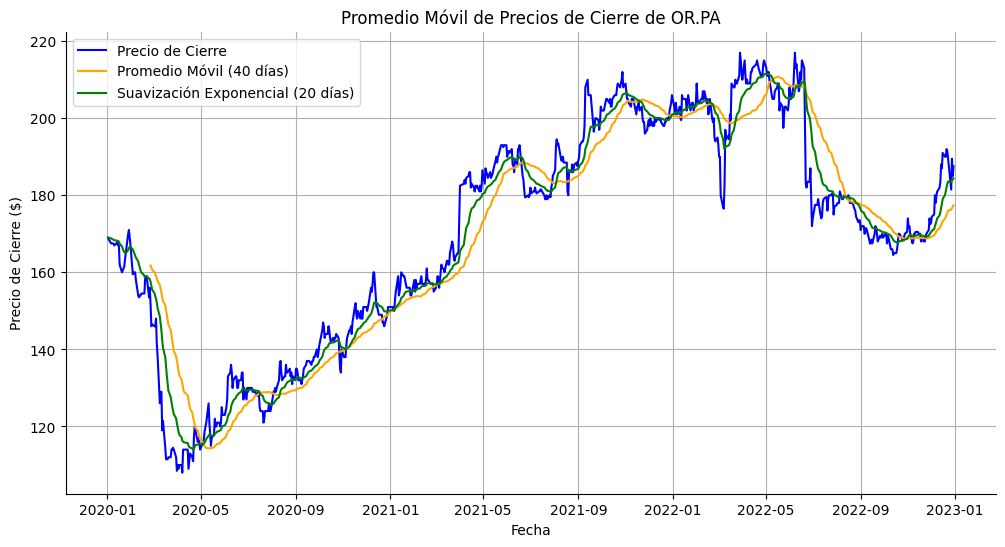

In [ ]:
ventana_sma = 40
df['SMA'] = df['SAMS.PA_Close'].rolling(window=ventana_sma).mean()
ventana_ses = 20
df['SES'] = df['SAMS.PA_Close'].ewm(span=ventana_ses, adjust=False).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['SAMS.PA_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='orange')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Cierre de OR.PA')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Para este analisis de la serie de tiempo se utilizaran ventanas estas consisten en tomar una parte de los datos de largo tiempo y analizarlo de manera independiente, al utilizar el calculo de las medias moviles con una ventana de 40 dias su funcion sera proporcionar una media en los precios a largo plazo en  para evitar fluctuacions en los precios.
La suavizacion exponencial se utiliza para ponderar los datos de manera que con una ventana de 20 dias, ayudara a que le de mas importancia a los datos recientes que a los antiguos para realizar su pronostico.
La importancia de la suavizacion exponencial es predecir valores futuros enfocandose en los datos reales recientes,  lo que lo convierte en un método útil cuando se busca reflejar las fluctuaciones recientes de los datos, sin sobrecargar el modelo con el ruido de eventos pasados lejanos.

**REGRESION INDIVIDUAL**

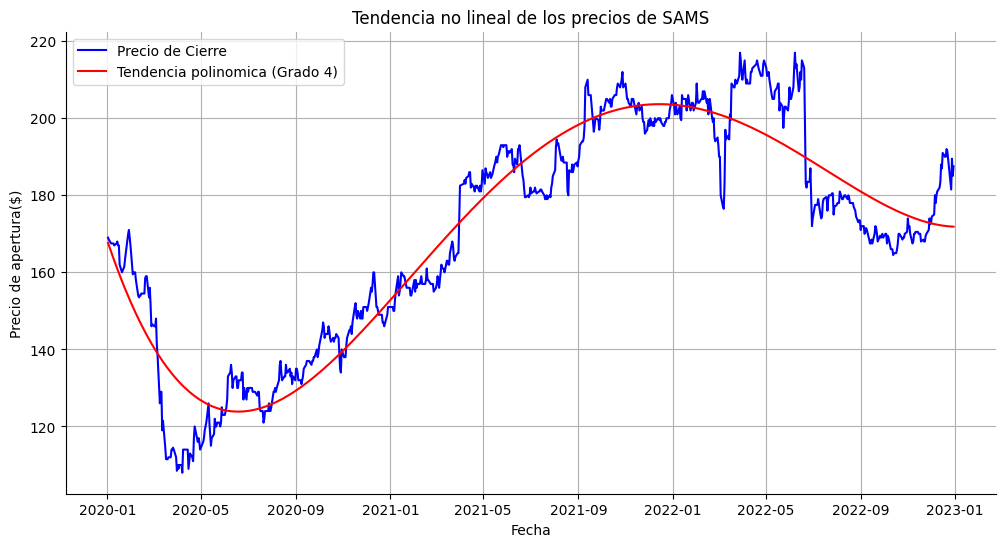

In [ ]:
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt
import statsmodels.api as sm
#convertir fechas a numeros
df["Date"]=pd.to_datetime(df.index)
df["Date"]=df["Date"].map(pd.Timestamp.to_julian_date)
x=df[["Date"]]
y=df["SAMS.PA_Close"]
#Ajustar el modelo polinomico
grado=4
modelo=Polynomial.fit(df["Date"], df["SAMS.PA_Close"], deg=grado)
df["Poly_Trend"]=modelo(df["Date"])
df['Poly_Residuals'] = df['SAMS.PA_Close'] - df['Poly_Trend']
plt.figure(figsize=(12, 6))
plt.plot(df['SAMS.PA_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['Poly_Trend'], label=f'Tendencia polinomica (Grado {grado})', color='red')
plt.title('Tendencia no lineal de los precios de SAMS')
plt.xlabel('Fecha')
plt.ylabel('Precio de apertura($)')
plt.legend()
plt.grid()
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

Como se muestra en la grafica se tiene mas variaciones en la tendencia o los componentes de esta serie de tiempo se adapto un modelo polinomial de grado 4
Ya que los datos muestran una tendencia que cambia de dirección más de una vez (por ejemplo, acelera y luego desacelera), un polinomio de grado 4 puede capturar mejor estos cambios que un modelo lineal o cuadrático.
La serie de tiempo muestra inflexibilidad y el grado 4 muestra suficiente flexibilidad para modelar comportamientos de la serie que incluyen puntos de inflexión (es decir, puntos en los que la tendencia cambia de dirección de manera significativa).

**GRAFICAR LOS RESIDUALES**

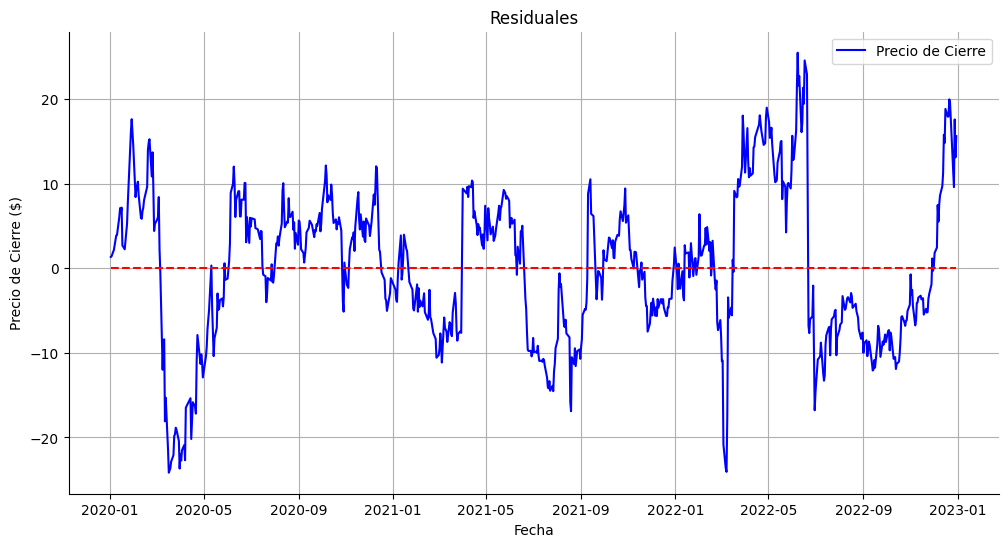

In [ ]:
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt
import statsmodels.api as sm

 #Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['Poly_Residuals'], label='Precio de Cierre', color='blue')
plt.hlines(y=0, xmin=df.index.min(), xmax=df.index.max(), linestyles='dashed', colors='red')
plt.title('Residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

Gráfico de residuales frente al tiempo: Este es el gráfico más común. Muestra los residuos contra el tiempo o el índice de las observaciones. En este caso, esperamos ver puntos dispersos sin ningún patrón.




**ESTACIONALIDAD DE LOS RESIDUALES**

In [ ]:
from statsmodels.tsa.stattools import adfuller
nivel_de_significancia=0.05
adf_test=adfuller(df["Poly_Residuals"].dropna())
print("Estadistico ADF:", adf_test[0])
print("p-value:", adf_test[2])
if adf_test[1]<=nivel_de_significancia:
    print("La serie es estacionaria")
else:
    print("La serie no es estacionaria")

Estadistico ADF: -4.428652005707123
p-value: 7
La serie es estacionaria


Que los residuales sean estacionaria si sus propiedades estadísticas (como la media, la varianza y la autocorrelación) no dependen del tiempo. Esto significa que el comportamiento de la serie es constante en el tiempo y no muestra tendencias o variaciones sistemáticas a lo largo de los periodos.

In [ ]:
from scipy.stats import ttest_rel
nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)
print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto signifiSAPivo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")


Estadístico t: -3.4122107155450312e-15
Valor p: 0.9999999999999973


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


La estacionalalidad no es significativa en este modelo por lo tanto se acepta la hipotesis nula y se rechaza la alternativa.

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")

**e) Descompón la serie de tiempo en sus componentes: tendencia, estacionalidad y ruido. Grafica la descomposición.**

In [ ]:
# Aquí no le muevan a nada
# Básicamente, lo que se hace este bloque es crear la función
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Con este codigo se grafican las series de furrier
Estas son herramientas matemáticas que se utilizan para descomponer funciones complejas o señales (como las de una serie de tiempo) en una suma de funciones senoidales (senos y cosenos) de diferentes frecuencias. Se utilizan principalmente para analizar y representar señales periódicas o cualquier tipo de datos que tengan componentes cíclicos.
Los marca en intervalos de 110 dias hasta 386 dias.


Frecuencias principales:
    frecuencia     magnitud  longitud_de_onda
0    0.006477  2172.719296        154.400000
1    0.005181  1801.396985        193.000000
2    0.009067  1477.255111        110.285714
3    0.011658  1351.046044         85.777778
4    0.007772  1295.043804        128.666667


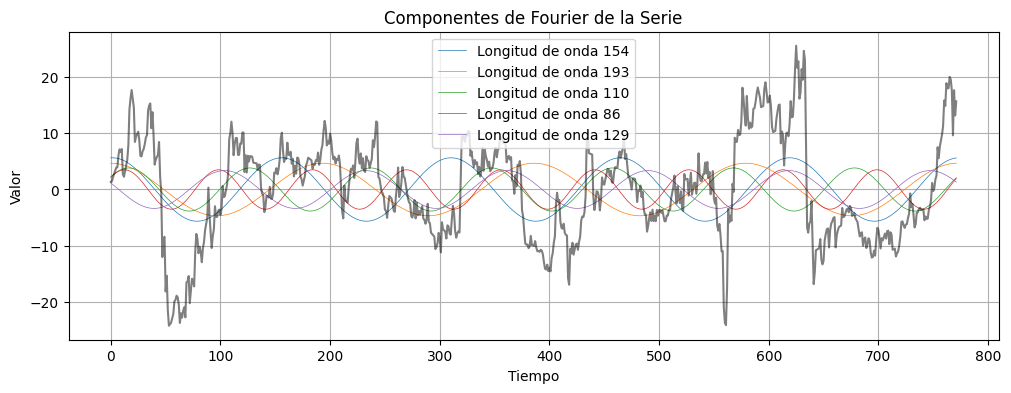

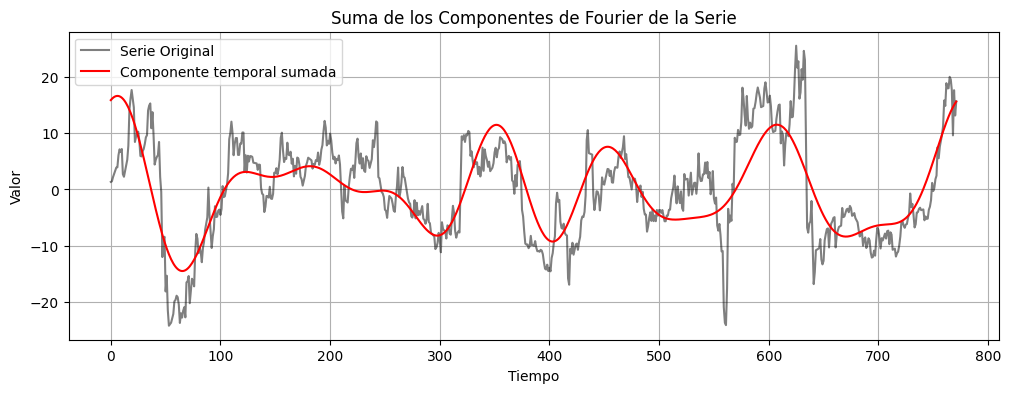

In [ ]:
serie = df['Poly_Residuals'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado

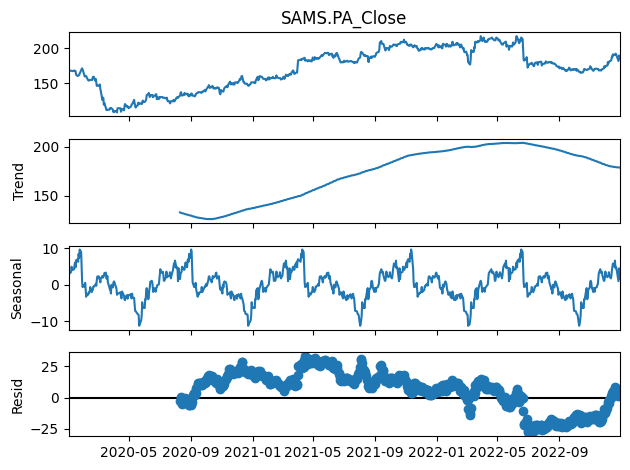

In [ ]:
import statsmodels.api as sm
descomposicion=sm.tsa.seasonal_decompose(
df["SAMS.PA_Close"], model="additive", period=154,
extrapolate_trend=0,
two_sided=False)
fig=descomposicion.plot()
plt.show()

La primera grafica es la serie real
La segunda grafica indica la tendencia el como hay una descendencia y posteriormente una subida en el precio de las acciones.
La tercera es la grafica de la estacionalidad, se ve donde no es sigificativa o inexistente.
Por ultimo esta grafica muestra que los residuales se mantienen constantes sobre la media

In [ ]:
from statsmodels.tsa.stattools import adfuller
nivel_de_significancia=0.05
adf_test=adfuller(descomposicion.resid.dropna())
print("Estadistico ADF:", adf_test[0])
print("p-value:", adf_test[2])
if adf_test[1]<=nivel_de_significancia:
    print("La serie es estacionaria")
else:
    print("La serie no es estacionaria")

Estadistico ADF: -1.559713628664034
p-value: 12
La serie no es estacionaria


**g) Utilizando los componentes de la descomposición, realiza un gráfico que contenga la serie de tiempo real, la tendencia, la serie sin estacionalidad, y la serie sin ruido.**

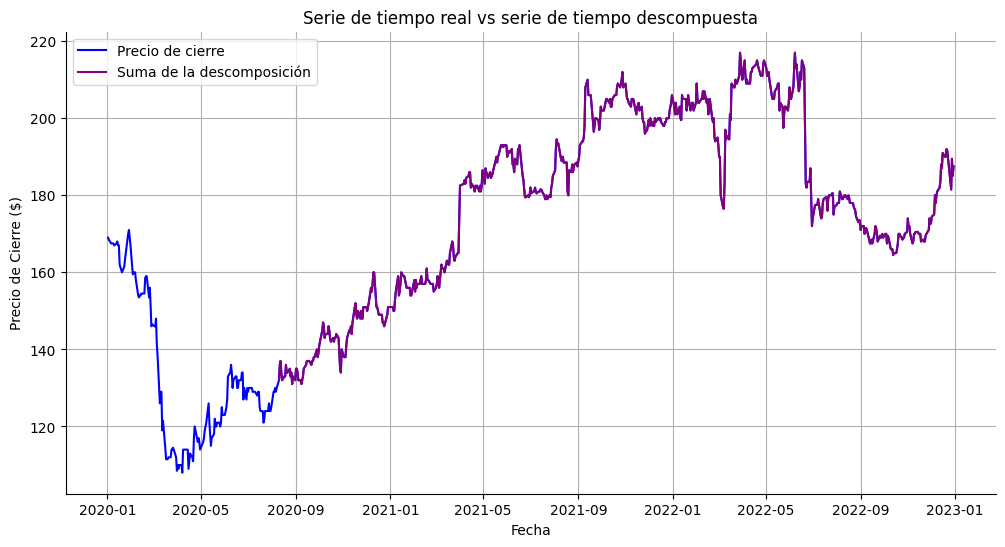

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['SAMS.PA_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

REAL

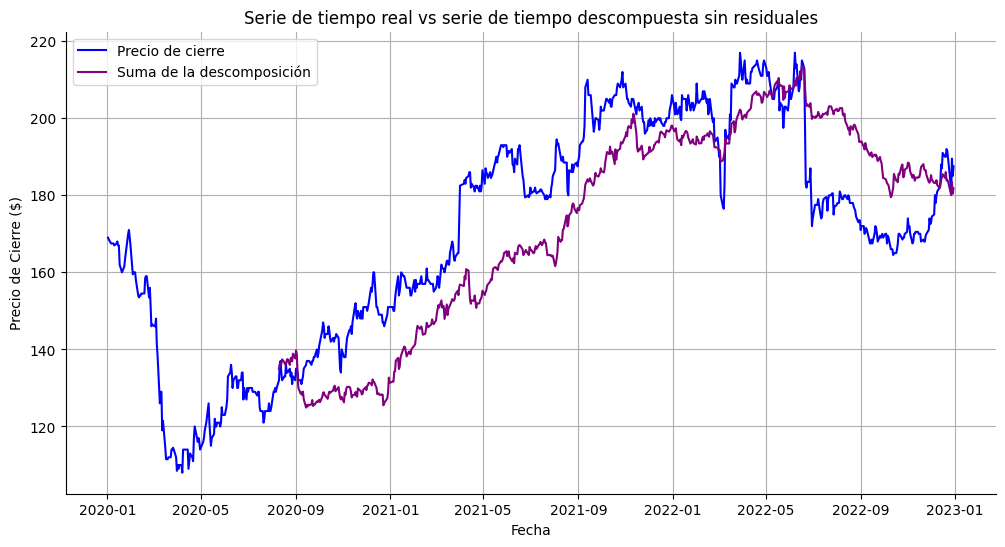

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['SAMS.PA_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

TENDENCIA

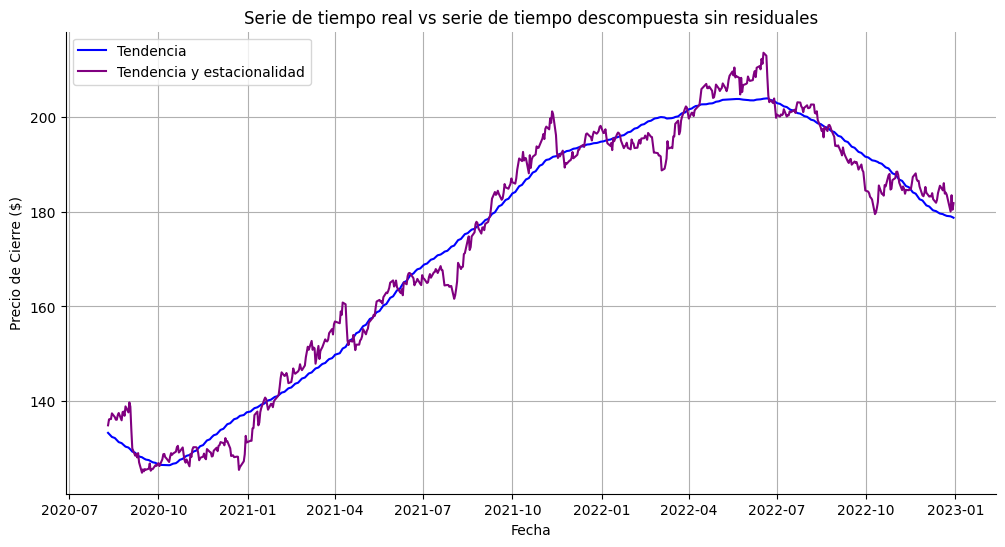

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(descomposicion.trend, label='Tendencia', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

REAL SIN ESTACIONALIDAD


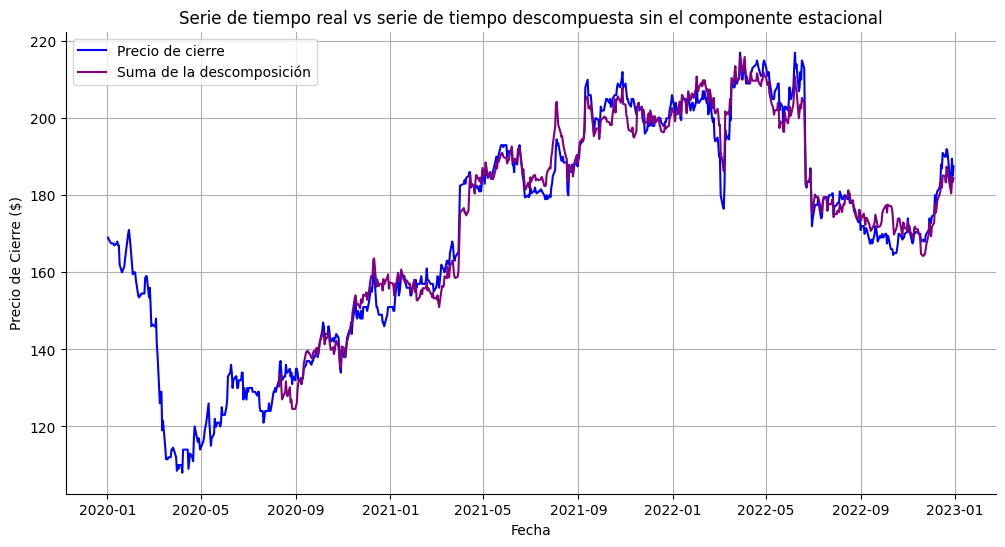

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['SAMS.PA_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**ANALISIS DE WAL-MART**

Como primer paso importamos todas las bibliotecas que necesitamos para trabajar este modelo, por ejemplo, matplot.pyplot, yfinance, pandas, etc. En el código para obtener los datos de las acciones, especificamos en “start” que será desde el 2020-01-01 y en “Interval” ponemos 1d, esto para indicar al código la fecha de inicio y final que deberá de buscar para obtener los datos e indicar que la unidad de tiempo será de 1 día.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

df = yf.download(
    tickers='WMT',
    start='2020-01-01',
    end='2023-01-01',
    interval='1d',
    group_by=None,
    auto_adjust=False,
    actions=False,
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

df = df.reset_index()

df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]

df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date

df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed


,WMT_Open,WMT_High,WMT_Low,WMT_Close,WMT_Adj Close,WMT_Volume
Date,,,,,,
2020-01-02,39.619999,39.963333,39.566666,39.646667,36.864075,20294700
2020-01-03,39.423332,39.596668,39.196667,39.296665,36.538639,16197600
2020-01-06,39.133331,39.363335,38.923332,39.216667,36.464249,19336500
2020-01-07,39.086666,39.173332,38.733334,38.853333,36.126415,20540700
2020-01-08,38.766666,38.910000,38.560001,38.720001,36.002441,17627400
...,...,...,...,...,...,...
2022-12-23,47.683334,47.933334,47.426666,47.923332,46.747608,9547500
2022-12-27,48.013332,48.150002,47.730000,47.936668,46.760616,10044600
2022-12-28,47.823334,47.889999,46.970001,47.096668,45.941227,15246300


Utilizamos la venta móvil simple para calcular el promedio de los últimos 40 días de cierre de la empresa Wal-Mart para cada punto de los datos ayudando a suavizar las fluctuaciones de precios y mostrar una tendencia general a lo largo del tiempo.
Utilizamos la ventana móvil exponencial en los precios de cierre de Wal-Mart para obtener una mayor sensibilidad en los datos más recientes, el parámetro de 20 afecta la rapidez con la que los datos más recientes tienen un mayor peso en el cálculo. Esta ventana puede responder más rápido a cambios más recientes en los precios.

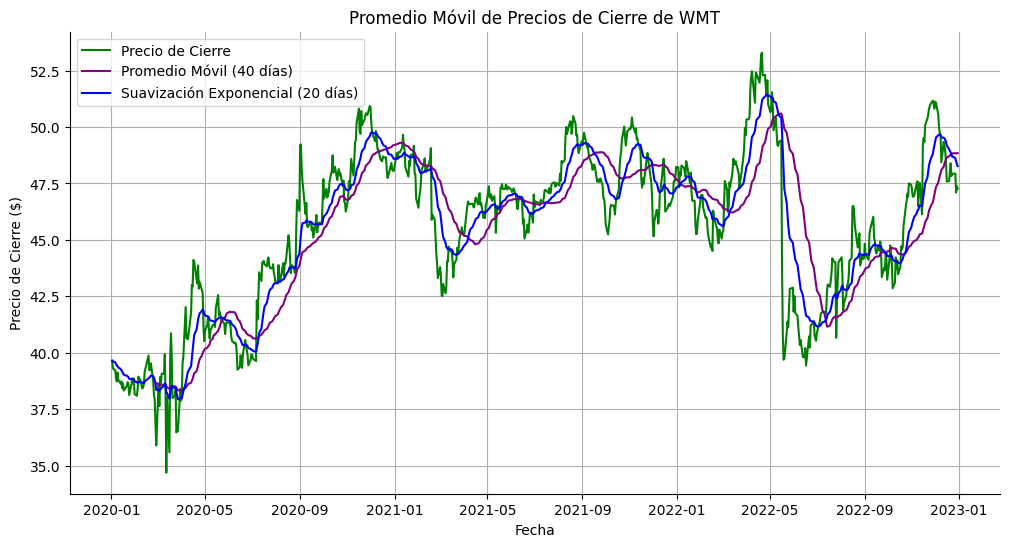

In [ ]:
# Promedio movil Simple
ventana_sma = 40
df['SMA'] = df['WMT_Close'].rolling(window=ventana_sma).mean()

# Promedio movil  Exponencial
ventana_ses = 20
df['SES'] = df['WMT_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar

plt.figure(figsize=(12, 6))
plt.plot(df['WMT_Close'], label='Precio de Cierre', color='green')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='purple')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='blue')
plt.title('Promedio Móvil de Precios de Cierre de WMT')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**INTERPRETACION:**

Se presentan fluctuaciones a mediados del año 2020 y a finales del 2021, donde el precio tiene un crecimiento constante pero con algunas correcciones, se presenta una mayor volatilidad a partir del año 2020, que a finales del mes de mayo del 2022 se puede observar un fuerte descenso que posteriormente tuvo un repunte. Este descenso se puede atribuir a las consecuencias que dejo la pandemia en el mercado, por mencionar una posible causa.
También podemos interpretar los cruces entre la línea azul (suavización exponencial de 20 días) cruza la línea morada (promedio móvil de 40 días), pueden ser señal de una tendencia alcista. Mientras que cuando la línea azul (suavización exponencial de 20 días) cruza por debajo de la línea morada (promedio móvil de 40 días) se podría tratar de una tendencia bajista.


Este código ajusta un modelo polinomico a los datos de precios de Wal-Mart y luego calcula la tendencia ajustada y los residuos. Las variables a utilizar para el modelo polinomico serán: X= Date; y la variable Y= WMT_Close, que contienen los precios de cierre de las acciones de Wal-Mart. También se ajustan los datos a un grado 7, donde cada término tiene un coeficiente que se ajustara para minimizar el error del modelo.

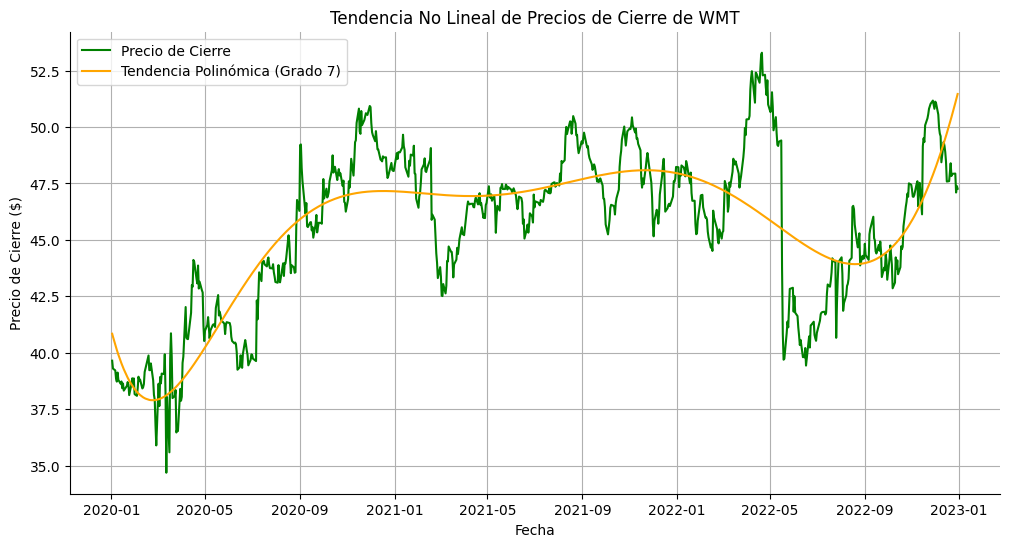

In [ ]:
from numpy.polynomial.polynomial import Polynomial

df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

X = df['Date']
y = df['WMT_Close']

grado = 7
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

plt.figure(
    figsize=(12, 6)
    )


plt.plot(
    y,
    label='Precio de Cierre',
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='orange')
plt.title('Tendencia No Lineal de Precios de Cierre de WMT')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**INTERPRETACION:**

Este grafico refleja los movimientos más relevantes del precio en el tiempo, por ejemplo, se observa que durante el periodo del año 2020 hay un crecimiento gradual en el precio después de tener una ligera caída al inicio. Después, la curva presenta un pico a finales de 2021 que comienza a descender en gran parte del año 2022. Y a finales del periodo, la tendencia toma nuevamente un crecimiento, indicando un inicio de recuperación.

Gráfico de los residuales del polinomio

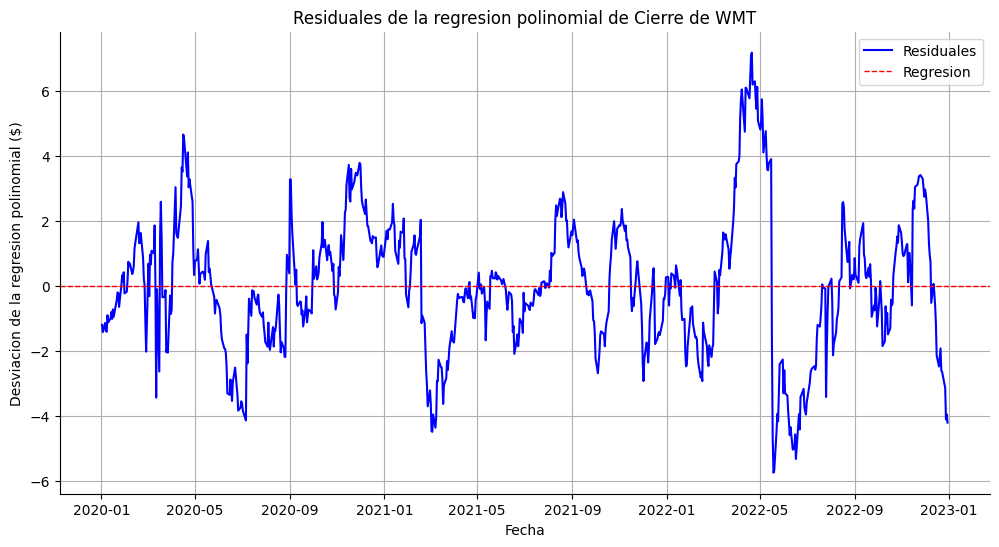

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Poly_Resid'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)
plt.title('Residuales de la regresion polinomial de Cierre de WMT')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**INTERPRETACION:**

A lo largo del gráfico, se muestra que los residuales se encuentran alrededor del 0, algo normal en una regresión, no obstante, hay periodos en los residuales muy significativos que pueden señalar eventos externos o momentos de alta volatilidad, lo que indica que aunque el modelo polinomio pueda capturar las tendencias generales, no puede explicar todas las variabilidades en el precio de cierre.

Aunque los residuales parezcan mostrar un patrón aleatorio, se pueden señalar ciertos patrones, como a mediados de 2020 y mayo de 2022, se presentan desviaciones, sugiriendo que el modelo tuvo una mayor dificultad para ajustar los datos en estos periodos.

A continuación utilizaremos las series de Fourier, están se usan en el análisis de series de tiempo para descomponer y capturar patrones periódicos o estacionalidades en los datos.

In [ ]:
# Aquí no le muevan a nada
# Básicamente, lo que se hace este bloque es crear la función
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia    magnitud  longitud_de_onda
0    0.011905  432.067045              84.0
1    0.007937  363.261648             126.0
2    0.006614  362.897999             151.2
3    0.005291  329.703622             189.0
4    0.015873  325.781199              63.0


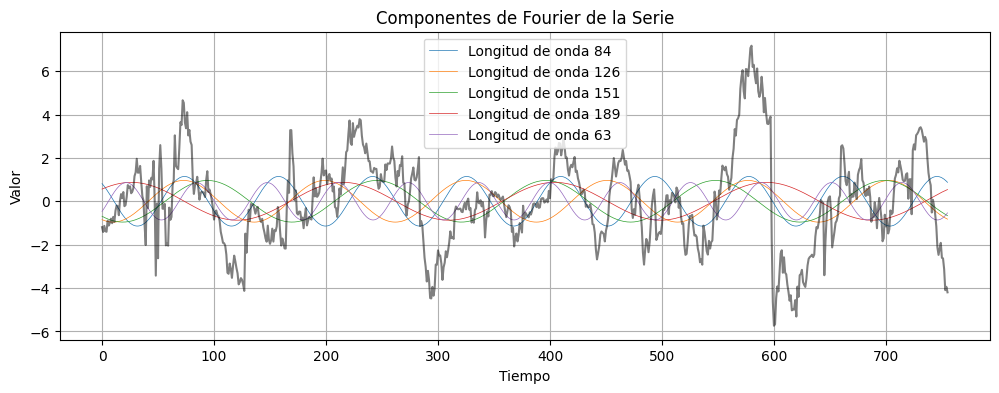

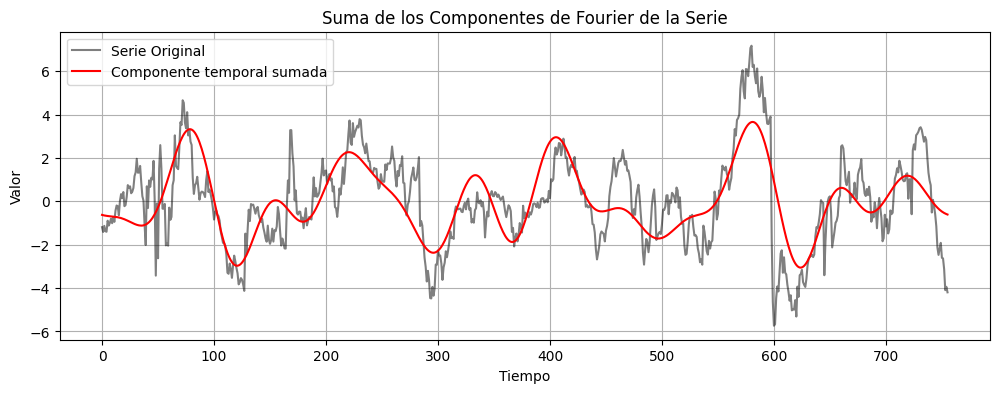

In [ ]:
serie = df['Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado

**INTERPRETACION:**

Las curvas coloreadas son los componentes de la serie de tiempo (patrones de estacionalidad, ruido, l tendencia y el pronóstico de la serie temporal). Las ondas de longitudes de onda más largas, describen los cambios generales o tendencias en la serie, como en este caso, la longitud de onda 84; las ondas de longitudes de onda más cortas representan detalles o fluctuaciones rápidas en la señal, como la longitud de onda 63.

En el segundo gráfico, la línea roja es la suma de todos los componentes de la serie de Fourier que nos darán una reconstrucción de la serie original.

Descomponemos la serie de tiempo para obtener sus componentes de tendencia, estacionalidad y ruido.
Usamos la longitud de onda más larga que es de 84 como el periodo dentro del código.

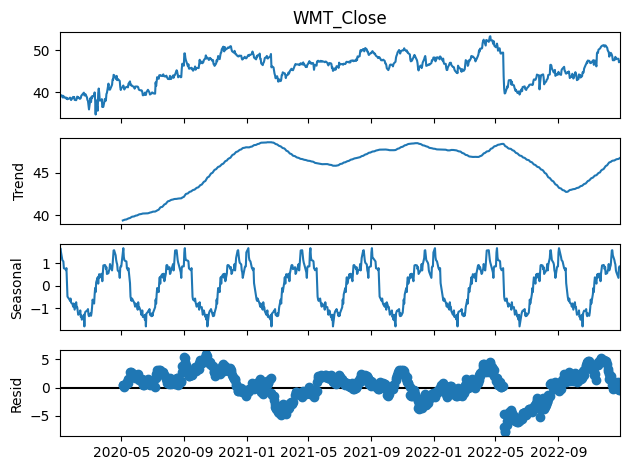

In [ ]:
import statsmodels.api as ms
descomposicion = ms.tsa.seasonal_decompose(
    df['WMT_Close'],
    model = 'additive',
    period = 84,
    extrapolate_trend=0,
    two_sided=False
)

descomposicion.plot()
plt.show()

Prueba de hipótesis para comprobar que se haya capturado correctamente la estacionalidad

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(descomposicion.resid.dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")


Estadístico ADF: -3.2916169576226064
p-value: 0.01525738061095181
La tendencia es estacionaria (rechazamos la hipótesis nula).


Prueba de hipótesis para comprobar si la estacionalidad es significativa

In [ ]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")

Estadístico t: -3.4122107155450312e-15
Valor p: 0.9999999999999973


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


Utilizando los componentes de la descomposición, realiza un gráfico que contenga la serie de tiempo real, la tendencia, la serie sin estacionalidad, y la serie sin ruido.

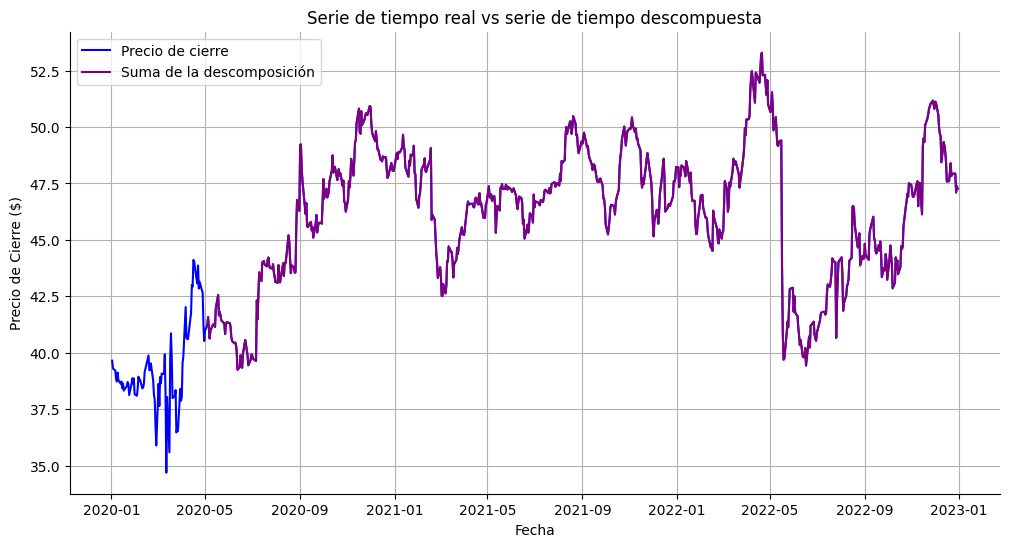

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['WMT_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

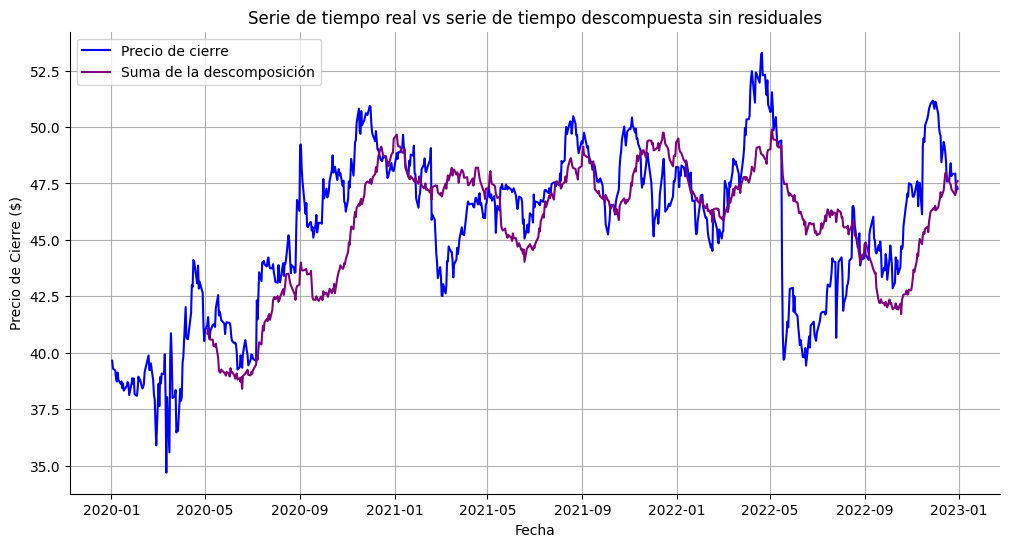

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['WMT_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

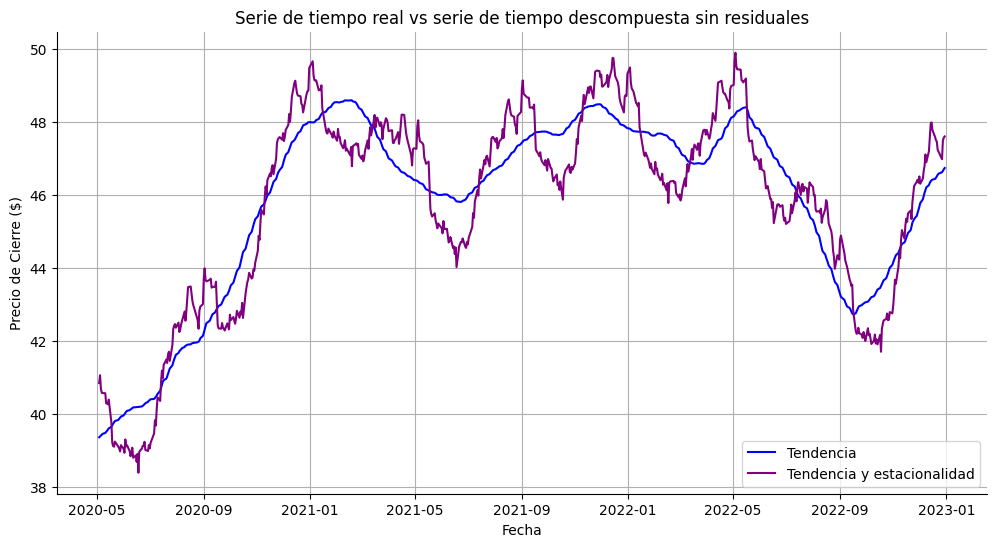

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(descomposicion.trend, label='Tendencia', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

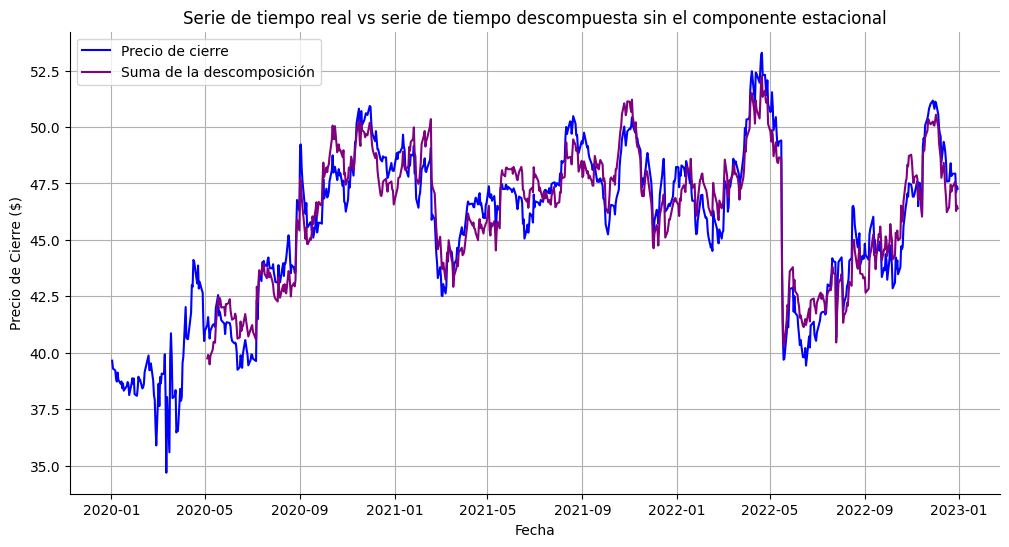

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['WMT_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()